In [14]:
import math
import os
import random
import matplotlib.pyplot as plt
import numpy as np

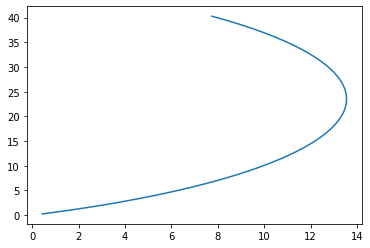

In [2]:
Beta = 0
velocity = 5
heading = 0.5
x = 0
y = 0
dt = 0.1
distance_lf = 0.52
distance_lr = 0.43
xs = []
ys = []

steering_angle = 2
acceleration = 0.2

for i in range(0,80):
    Beta = math.atan((distance_lr/(distance_lr+distance_lf))*math.tan(steering_angle*math.pi/180))
    velocity = velocity + acceleration*dt
    heading = heading + (velocity/distance_lr)* math.sin(Beta)*dt

    x = x + velocity * math.cos(heading+Beta) * dt
    xs.append(x)
    y = y + velocity * math.sin(heading+Beta) * dt
    ys.append(y)
    
plt.plot(xs,ys)

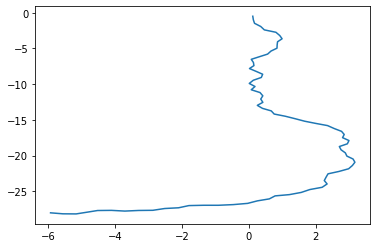

In [3]:
Beta = 0
velocity = 5
heading = 5
x = 0
y = 0
dt = 0.1
distance_lf = 0.52
distance_lr = 0.43
xs = []
ys = []

for i in range(0,80):
    steering_angle = random.randint(-37, 37)
    acceleration = random.uniform(-1.5, 1)
    
    Beta = math.atan((distance_lr/(distance_lr+distance_lf))*math.tan(steering_angle*math.pi/180))

    velocity = velocity + acceleration*dt
    heading = heading + (velocity/distance_lr)* math.sin(Beta)*dt

    x = x + velocity * math.cos(heading+Beta) * dt
    xs.append(x)
    y = y + velocity * math.sin(heading+Beta) * dt
    ys.append(y)
    
plt.plot(xs,ys)

In [4]:
sample = np.load('./waymo-motion-prediction-2021-main/train_KF/cyclist_3_00007_5944174399.npz')
id = 7

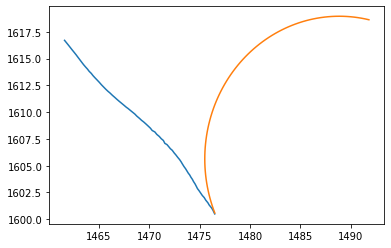

In [5]:
#Ground Truth
x_coor = []
y_coor = []
for item in sample["_gt_marginal"]:
    x_coor.append(item[0])
    y_coor.append(item[1])

#Kinematic model prediction
Beta = sample["current_velocity_yaw"][id][0]-sample["current_heading"][id][0]
velocity = sample["current_speed"][id][0]
heading = sample["current_heading"][id][0]
x = sample["current_x"][id][0]
y = sample["current_y"][id][0]
dt = 0.1
distance_lf = 0.52
distance_lr = 0.43
xs = []
ys = []

steering_angle = math.atan(math.tan(Beta)/(distance_lr/(distance_lr+distance_lf)))
acceleration = 0

for i in range(0,80):
    
    Beta = math.atan((distance_lr/(distance_lr+distance_lf))*math.tan(steering_angle))

    velocity = velocity + acceleration*dt
    heading = heading + (velocity/distance_lr)* math.sin(Beta)*dt

    x = x + velocity * math.cos(heading+Beta) * dt
    xs.append(x)
    y = y + velocity * math.sin(heading+Beta) * dt
    ys.append(y)
plt.plot(x_coor,y_coor)
plt.plot(xs,ys)
plt.show()

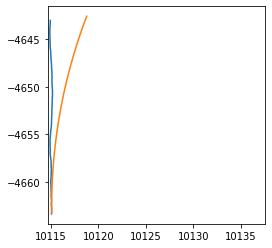

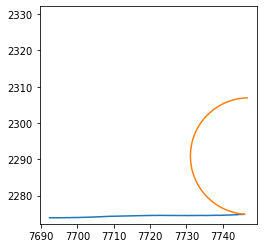

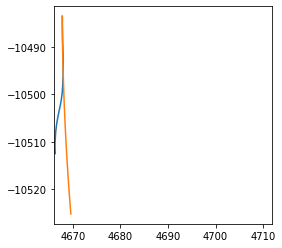

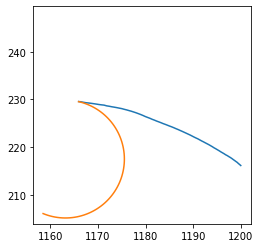

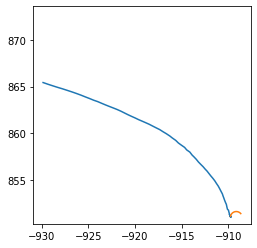

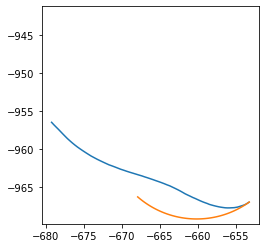

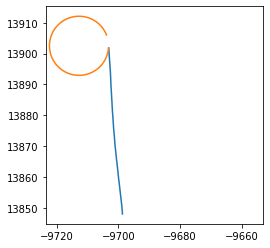

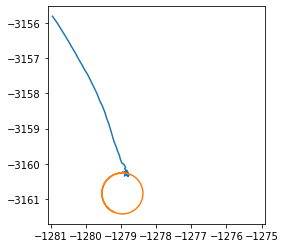

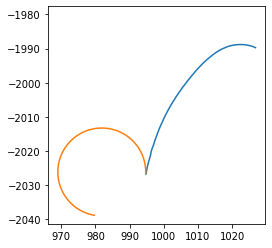

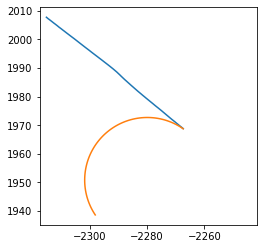

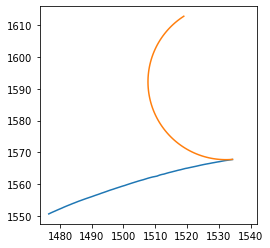

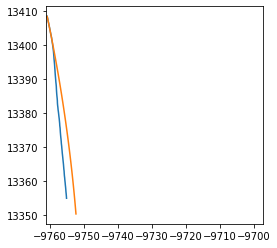

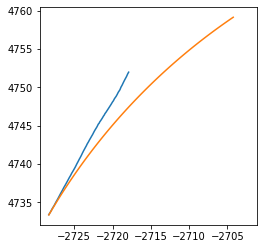

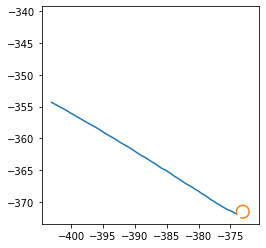

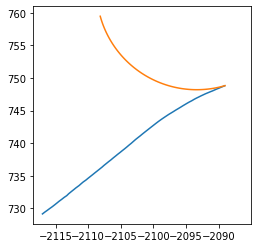

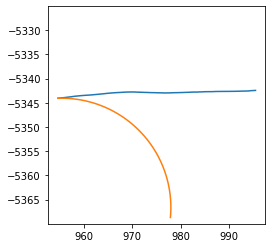

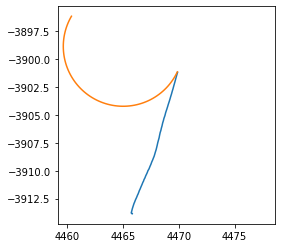

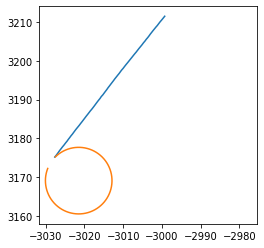

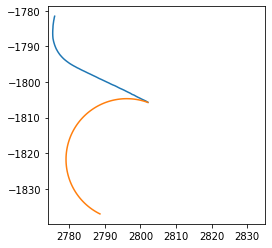

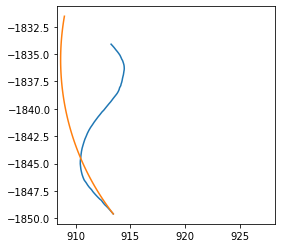

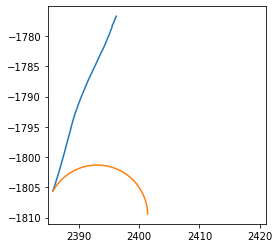

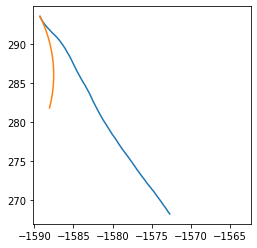

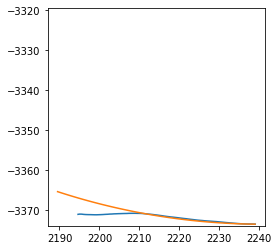

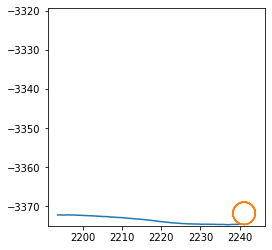

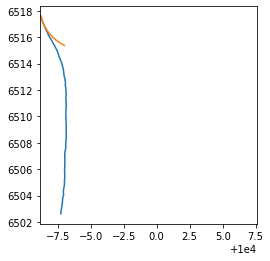

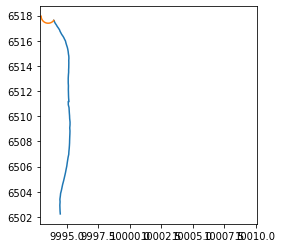

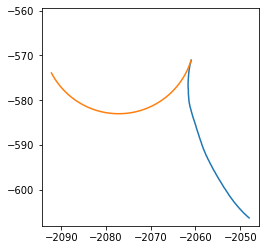

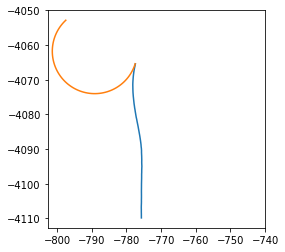

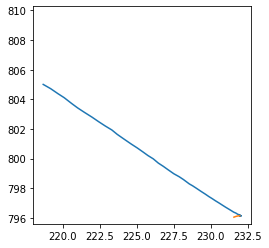

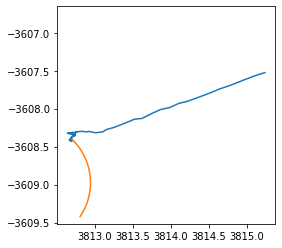

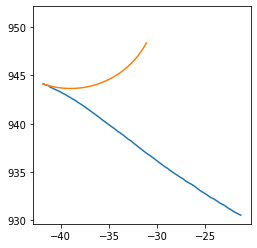

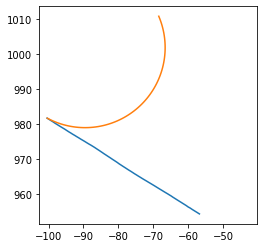

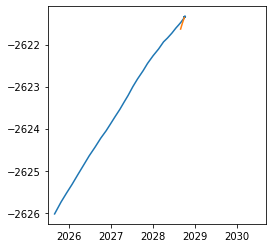

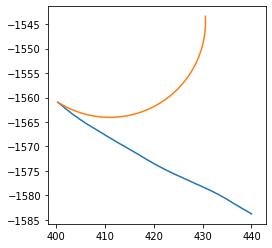

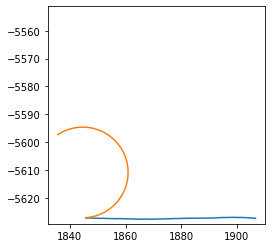

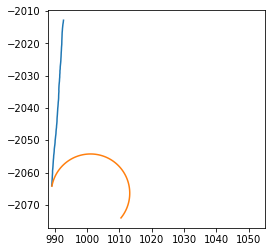

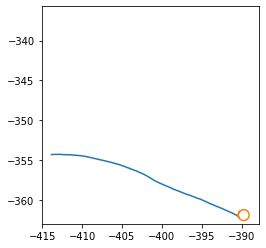

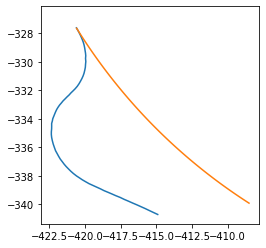

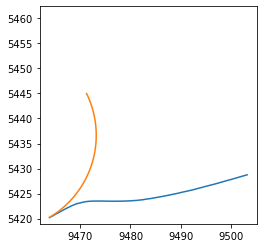

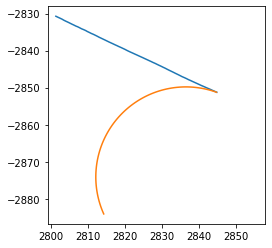

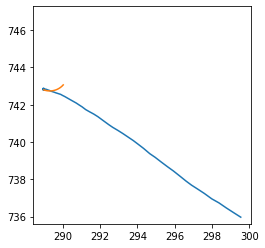

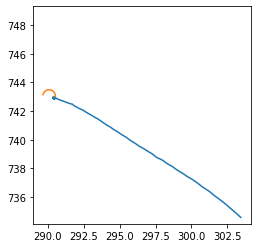

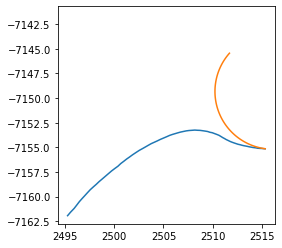

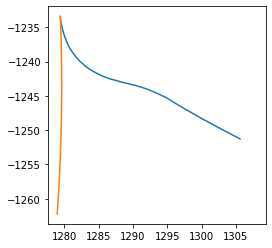

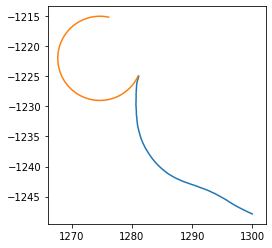

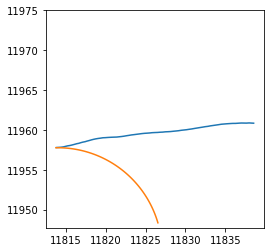

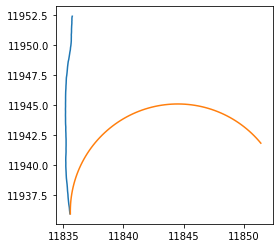

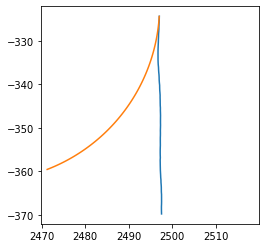

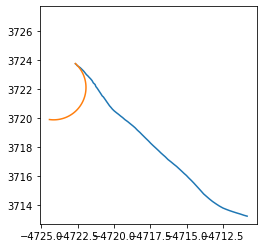

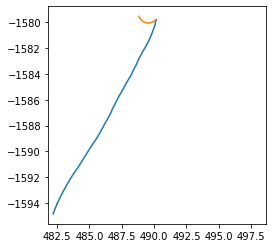

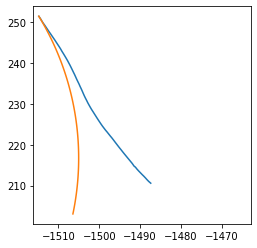

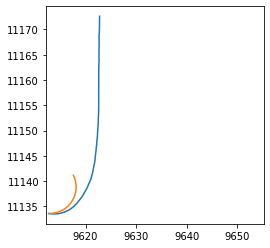

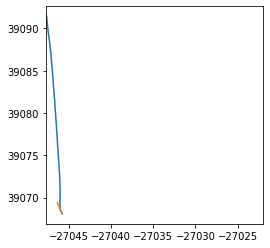

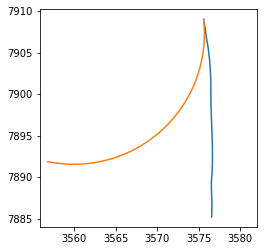

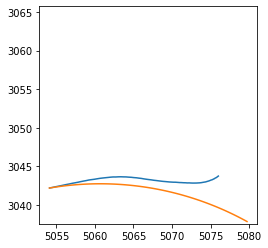

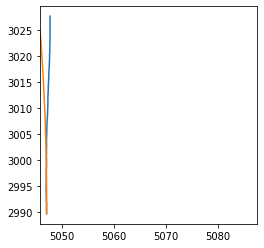

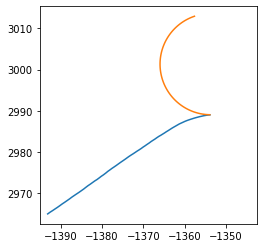

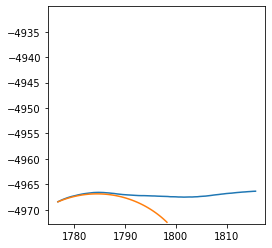

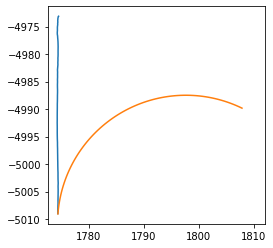

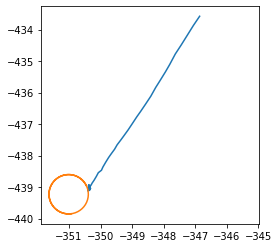

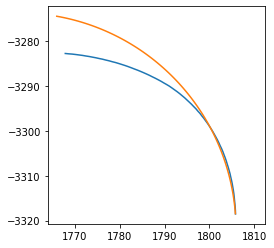

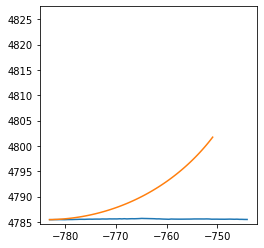

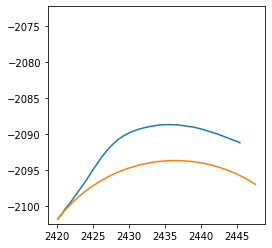

In [6]:
timelimit = 80
for item in os.listdir("./waymo-motion-prediction-2021-main/train_KF/")[:100]:
    sample = np.load('./waymo-motion-prediction-2021-main/train_KF/' + item)
    id = int(item.split('_')[2])

    #Ground Truth
    x_coor = []
    y_coor = []
    for step in sample["_gt_marginal"][:timelimit]:
        x_coor.append(step[0])
        y_coor.append(step[1])
    if -1 in x_coor:
        continue

    #Kinematic model prediction
    Beta = sample["current_velocity_yaw"][id][0]-sample["current_heading"][id][0]
    velocity = sample["current_speed"][id][0]
    heading = sample["current_heading"][id][0]
    x = sample["current_x"][id][0]
    y = sample["current_y"][id][0]
    dt = 0.1
    distance_lf = 0.52
    distance_lr = 0.43
    xs = []
    ys = []

    steering_angle = math.atan(math.tan(Beta)/(distance_lr/(distance_lr+distance_lf)))
    acceleration = 0

    for i in range(0,timelimit):

        Beta = math.atan((distance_lr/(distance_lr+distance_lf))*math.tan(steering_angle))
        velocity = velocity + acceleration*dt
        heading = heading + (velocity/distance_lr)* math.sin(Beta)*dt
        
        x = x + velocity * math.cos(heading+Beta) * dt
        xs.append(x)
        y = y + velocity * math.sin(heading+Beta) * dt
        ys.append(y)
        
    
        
    plt.plot(x_coor,y_coor)
    plt.plot(xs,ys)
    plt.axis('square')
    plt.show(block=False)

In [26]:
steer_angles = []
for i in range(0,10000):
    steer_angles.append(math.sin(i/1000)/5)
acceleration = []
for i in range(0,10000):
    acceleration.append(math.cos(i/10000+4.5)/2)

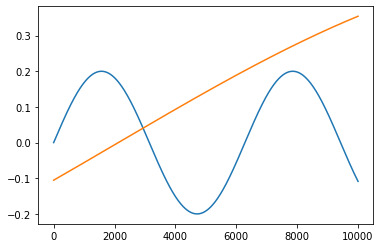

In [27]:
plt.plot(steer_angles)
plt.plot(acceleration)

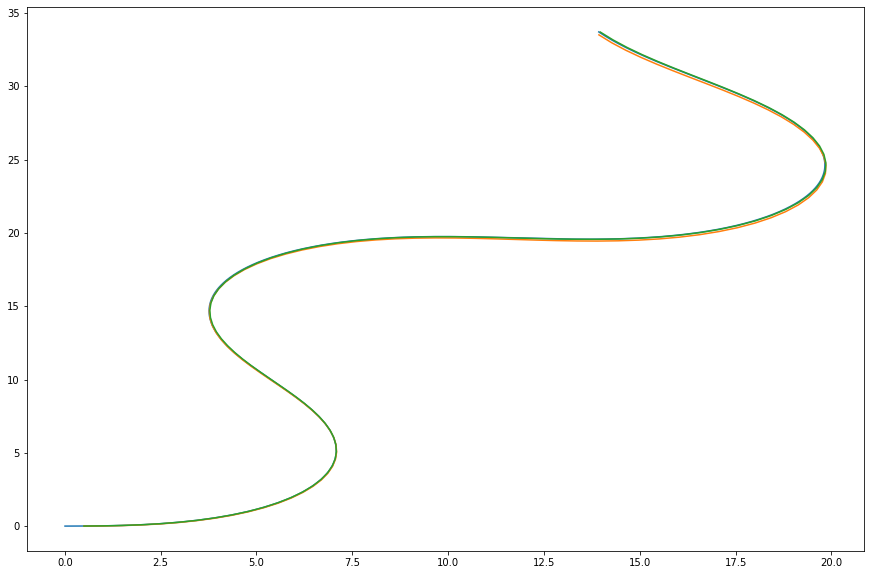

In [28]:
Beta = 0
velocity = 5
heading = 0
x = 0
y = 0

p_Beta = 0
p_velocity = 5
p_heading = 0
p_x = 0
p_y = 0

interp_Beta = 0
interp_velocity = 5
interp_heading = 0
interp_x = 0
interp_y = 0

dt = 0.001
p_dt = 0.1
distance_lf = 0.52
distance_lr = 0.43
ground_xs = []
ground_ys = []
pred_xs = []
pred_ys = []
interp_xs = []
interp_ys = []

for i in range(0,int(10/dt)):
    #ground
    Beta = math.atan((distance_lr/(distance_lr+distance_lf))*math.tan(steer_angles[i]))
    velocity = velocity + acceleration[i]*dt
    heading = heading + (velocity/distance_lr)* math.sin(Beta)*dt
    
    x = x + velocity * math.cos(heading+Beta) * dt
    ground_xs.append(x)
    y = y + velocity * math.sin(heading+Beta) * dt
    ground_ys.append(y)
    
    #predicted
    if i % int(10*p_dt*100) == 0:
        p_Beta = math.atan((distance_lr/(distance_lr+distance_lf))*math.tan(steer_angles[i]))
        
        p_velocity = p_velocity + acceleration[i]*p_dt
        p_heading = p_heading + (p_velocity/distance_lr)* math.sin(p_Beta)*p_dt
        
        p_x = p_x + p_velocity * math.cos(p_heading+p_Beta) * p_dt
        pred_xs.append(p_x)
        p_y = p_y + p_velocity * math.sin(p_heading+p_Beta) * p_dt
        pred_ys.append(p_y)
        
    # predicted with additional interpolation
    if i % int(10*p_dt*100) == 0:
        interp_steerangle   = steer_angles[i]
        interp_acceleration = acceleration[i]
        for j in range(10):
            interp_Beta = math.atan((distance_lr/(distance_lr+distance_lf))*math.tan(interp_steerangle))

            interp_velocity = interp_velocity + interp_acceleration*p_dt**2
            interp_heading = interp_heading + (interp_velocity/distance_lr)* math.sin(interp_Beta)*p_dt**2

            interp_x = interp_x + interp_velocity * math.cos(interp_heading+interp_Beta) * p_dt**2
            interp_y = interp_y + interp_velocity * math.sin(interp_heading+interp_Beta) * p_dt**2
            try:
                interp_steerangle += (steer_angles[i+100]-steer_angles[i])*p_dt
                interp_acceleration += (acceleration[i+100]-acceleration[i])*p_dt
            except:
                pass
        interp_xs.append(interp_x) 
        interp_ys.append(interp_y)
        
plt.figure(figsize=(15,10))
plt.plot(ground_xs,ground_ys)
plt.plot(pred_xs,pred_ys)
plt.plot(interp_xs,interp_ys)

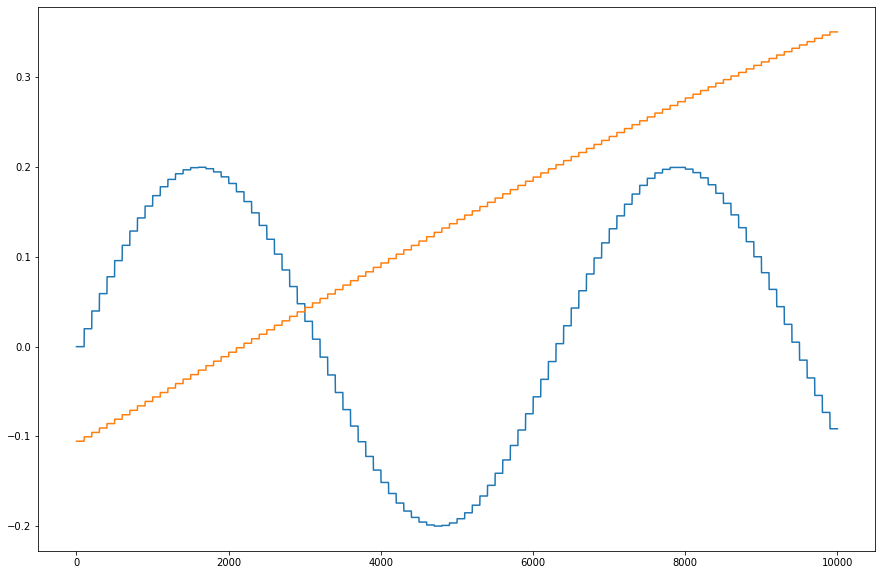

In [29]:
p_steer_angles = []
steer_angle = steer_angles[0]
for i in range(0,int(10/dt)):
    p_steer_angles.append(steer_angle)
    if i % int(10*p_dt*100) == 0:
        steer_angle = steer_angles[i]
p_acceleration = []
accel = acceleration[0]
for i in range(0,int(10/dt)):
    p_acceleration.append(accel)
    if i % int(10*p_dt*100) == 0:
        accel = acceleration[i]
plt.figure(figsize=(15,10))
plt.plot(p_steer_angles)
plt.plot(p_acceleration)